In [1]:
import zipfile
import os
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the uploaded zip file and the extraction folder


In [2]:
zip_file_path = '/content/archive (1).zip'
extraction_path = '/mnt/data/coil_dataset/'

# Extract the contents of the zip file


In [3]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files to confirm the dataset structure


In [4]:
os.listdir(extraction_path)

['coil-20']

# List the contents of the 'coil-20' directory to check the dataset structure


In [5]:
coil20_path = os.path.join(extraction_path, 'coil-20')
os.listdir(coil20_path)[:10]

['coil-20-proc', 'coil-20-unproc']

# List contents of the 'coil-20-proc' directory to inspect image files


In [6]:
proc_path = os.path.join(coil20_path, 'coil-20-proc')
os.listdir(proc_path)[:10]

['obj7__67.png',
 'obj8__64.png',
 'obj10__46.png',
 'obj12__12.png',
 'obj17__36.png',
 'obj13__28.png',
 'obj6__45.png',
 'obj1__6.png',
 'obj5__32.png',
 'obj7__17.png']

# Constants


In [7]:
IMG_SIZE = (64, 64)  # Resize images to 64x64
IMAGE_DIR = proc_path

# Load and preprocess images


In [8]:
def load_images(image_dir, img_size):
    images = []
    for file_name in sorted(os.listdir(image_dir)):
        if file_name.endswith(".png"):
            img_path = os.path.join(image_dir, file_name)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)

# Load the dataset


In [9]:
images = load_images(IMAGE_DIR, IMG_SIZE)
print(f"Dataset shape: {images.shape}")

Dataset shape: (1440, 64, 64, 1)


# Split into train and test sets (80%-20% split)


In [10]:
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training set shape: {train_images.shape}, Testing set shape: {test_images.shape}")

Training set shape: (1152, 64, 64, 1), Testing set shape: (288, 64, 64, 1)


# Constants


In [11]:
IMG_SIZE = (64, 64)  # Resize images to 64x64
IMAGE_DIR = proc_path

# Dataset: Load and preprocess images


In [12]:
def load_images(image_dir, img_size):
    """
    Load and preprocess images from the dataset.
    Resizes and normalizes the images to [0, 1].
    """
    images = []
    for file_name in sorted(os.listdir(image_dir)):
        if file_name.endswith(".png"):
            img_path = os.path.join(image_dir, file_name)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)

# Load the dataset


In [13]:
images = load_images(IMAGE_DIR, IMG_SIZE)
print(f"Dataset shape: {images.shape}")

Dataset shape: (1440, 64, 64, 1)


# Visualize sample images


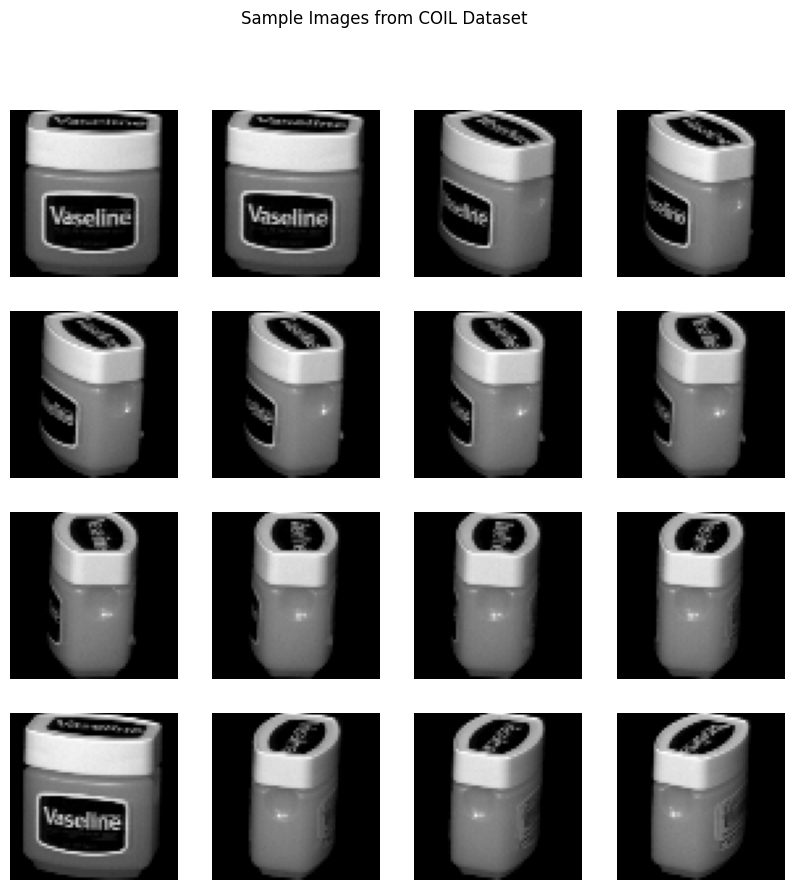

In [14]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Images from COIL Dataset')
plt.show()

# Split the dataset into training and testing sets


In [15]:
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training set shape: {train_images.shape}, Testing set shape: {test_images.shape}")

Training set shape: (1152, 64, 64, 1), Testing set shape: (288, 64, 64, 1)


# Model Development: Define the CNN Autoencoder


In [16]:
def create_autoencoder(input_shape):
    """
    Creates a CNN Autoencoder with an encoder and a decoder.
    Encoder compresses the image into a latent space.
    Decoder reconstructs the image from the latent space.
    """
    # Encoder
    input_img = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', strides=(2, 2), padding='same')(x)

    # Model
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Create and summarize the autoencoder


In [17]:
input_shape = (64, 64, 1)
autoencoder = create_autoencoder(input_shape)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

# Training: Compile and train the autoencoder


In [18]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(
    train_images, train_images,  # Input and output are the same
    epochs=20,
    batch_size=32,
    validation_data=(test_images, test_images)
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1269 - val_loss: 0.0282
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - val_loss: 0.0174
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - val_loss: 0.0126
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0096 - val_loss: 0.0099
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - val_

# Evaluation


# Plot loss curve


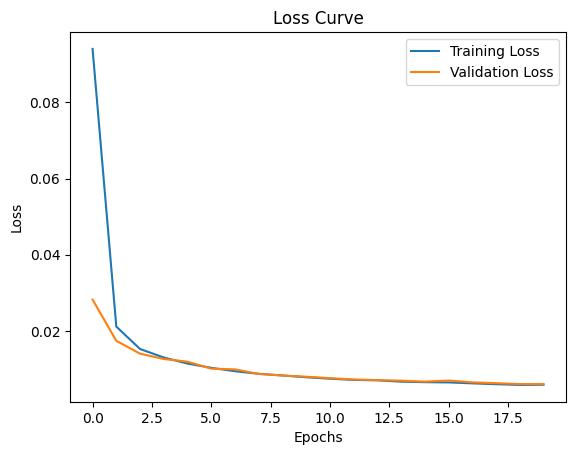

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Calculate and report the test set MSE


In [20]:
test_mse = autoencoder.evaluate(test_images, test_images)
print(f"Test MSE: {test_mse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 
Test MSE: 0.005995141342282295


# Visualize original and reconstructed images


In [21]:
n = 5
decoded_images = autoencoder.predict(test_images[:n])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


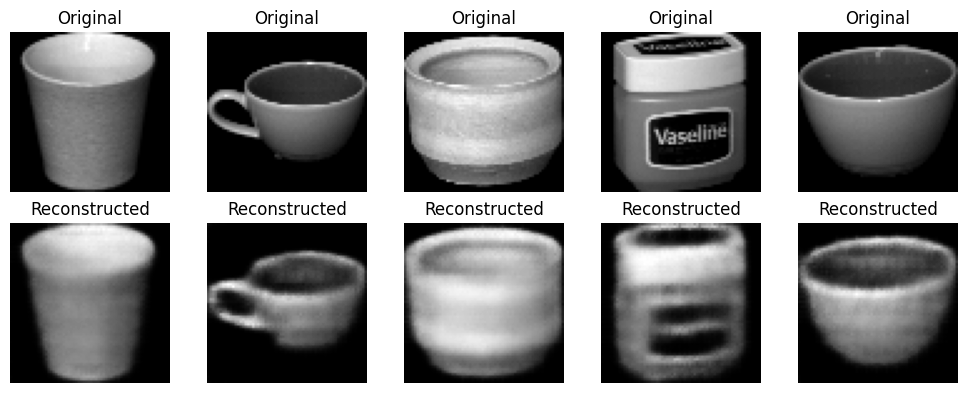

In [22]:
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(64, 64), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Interpretation

**Model Performance**: The CNN autoencoder effectively compressed and reconstructed grayscale images from the COIL-20 dataset.  

**Loss Reduction**: Training loss decreased from 0.1269 to 0.0055, and validation loss from 0.0282 to 0.006 over 20 epochs.

**Generalization**: Test set MSE was low (~0.006), indicating good generalization to unseen data.  

**Visual Results**: Reconstructed images closely resembled the original inputs, confirming effective feature retention.  

**Conclusion**: The model demonstrated strong performance in balancing image compression and reconstruction accuracy.